### currently, pre processing steps are further below
(named: pre processing and training data development)

# exploratory data analysis

In [1]:
from ucimlrepo import fetch_ucirepo 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

sns.set()

In [2]:
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 

In [3]:
# metadata 
# print(cdc_diabetes_health_indicators.metadata) 

# variable information 
# print(cdc_diabetes_health_indicators.variables)

In [4]:
# import seaborn as sns

# sns.pairplot(X)
# plt.show()

In [5]:
# x_subset = X.head(10)
# sns.pairplot(x_subset)
# plt.show()

In [6]:
X.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
# plt.figure(figsize=(16, 12))
# sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
# plt.show()

In [8]:
corr_matrix = X.corr()

# Extract pairs of variables with the highest correlations
highest_corr_pairs = (corr_matrix.abs().unstack().reset_index(name='correlation')
                      .sort_values(by='correlation', ascending=False))

# Filter out pairs with the same variable (correlation of 1)
highest_corr_pairs = highest_corr_pairs[highest_corr_pairs['correlation'] < 1]

# Remove duplicates
unique_corr_pairs = highest_corr_pairs.drop_duplicates(subset='correlation', keep='first')

# Display the top N highest correlation pairs
top_n = 10  # Set the number of top correlations you want to display
top_corr_pairs = unique_corr_pairs.head(top_n)

# Print the result
print("Top", top_n, "unique correlation pairs:")
print(top_corr_pairs[['level_0', 'level_1', 'correlation']])

Top 10 unique correlation pairs:
      level_0    level_1  correlation
288   GenHlth   PhysHlth     0.524364
331  PhysHlth   DiffWalk     0.478417
289   GenHlth   DiffWalk     0.456920
439    Income  Education     0.449106
433    Income    GenHlth     0.370014
309  MentHlth   PhysHlth     0.353619
378       Age     HighBP     0.344452
356  DiffWalk     Income     0.320124
287   GenHlth   MentHlth     0.301674
273   GenHlth     HighBP     0.300530



### LEGEND FOR ALL GRAPHS IN DESCRIPTION COLUMN BELOW


In [9]:
# Set maximum display width to None (unlimited)
pd.set_option('display.max_colwidth', None)

cdc_diabetes_health_indicators.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,Patient ID,None,no
1,Diabetes_binary,Target,Binary,None,0 = no diabetes 1 = prediabetes or diabetes,None,no
2,HighBP,Feature,Binary,None,0 = no high BP 1 = high BP,None,no
3,HighChol,Feature,Binary,None,0 = no high cholesterol 1 = high cholesterol,None,no
4,CholCheck,Feature,Binary,None,0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years,None,no
5,BMI,Feature,Integer,None,Body Mass Index,None,no
6,Smoker,Feature,Binary,None,Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes,None,no
7,Stroke,Feature,Binary,None,(Ever told) you had a stroke. 0 = no 1 = yes,None,no
8,HeartDiseaseorAttack,Feature,Binary,None,coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes,None,no
9,PhysActivity,Feature,Binary,None,physical activity in past 30 days - not including job 0 = no 1 = yes,None,no


In [10]:
# cdc_diabetes_health_indicators.transpose()
# print(type(cdc_diabetes_health_indicators))

<Axes: >

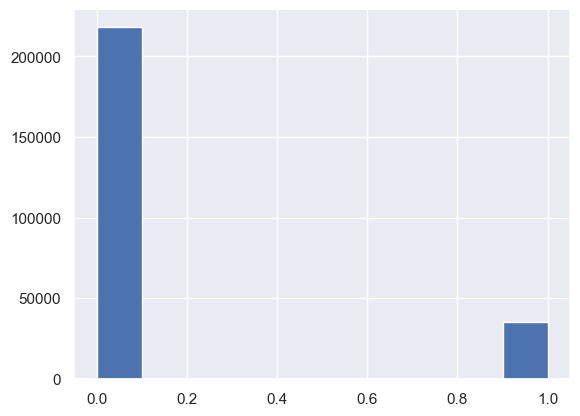

In [11]:
# histograms

# 1
y['Diabetes_binary'].hist()

<Axes: >

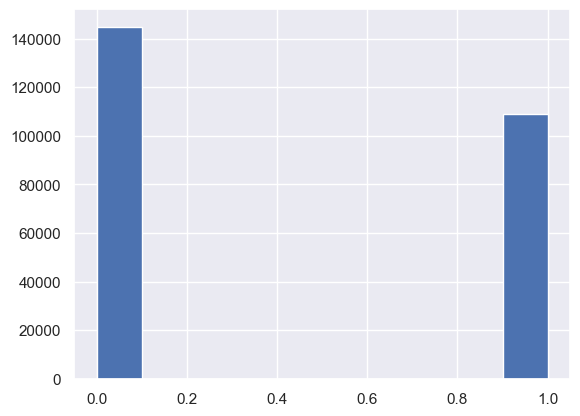

In [12]:
# 2
X['HighBP'].hist()

<Axes: >

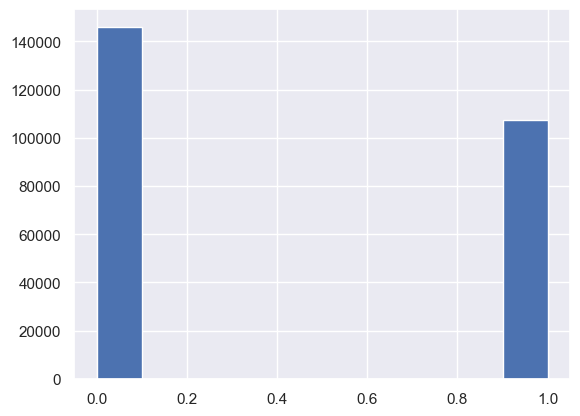

In [13]:
# 3
X['HighChol'].hist()

<Axes: >

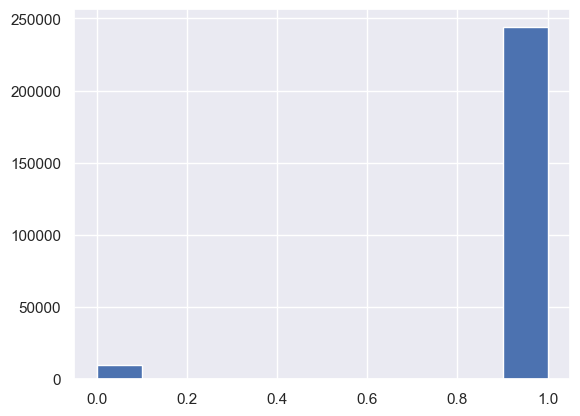

In [14]:
# 4
X['CholCheck'].hist()

# 5
# X['BMI'].hist()

# 6
# X['Smoker'].hist()

# 7
# X['Stroke'].hist()

# 8
# X['HeartDiseaseorAttack'].hist()

# 9
# X['PhysActivity'].hist()

# 10
# X['Fruits'].hist()

# 11
# print(X['Veggies'].hist())

# 12
# print(X['HvyAlcoholConsump'].hist())

# 13
# print(X['AnyHealthcare'].hist())

# 14
# print(X['NoDocbcCost'].hist())

# 15
# print(X['GenHlth'].hist())

# 16
# print(X['MentHlth'].hist())

# 17
# print(X['PhysHlth'].hist())

# 18
# print(X['DiffWalk'].hist())

# 19
# print(X['Sex'].hist())

# 20
# print(X['Age'].hist())

# 21
# print(X['Education'].hist())

# 22
# print(X['Income'].hist())


In [4]:
# combine the two dataframes
combined_diabetes = X.join(y, how='inner')
combined_diabetes = combined_diabetes[['Diabetes_binary'] + [col for col in combined_diabetes.columns if col != 'Diabetes_binary']]
combined_diabetes

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [16]:
# # full graph

# plt.figure(figsize=(24, 12))
# # plt.figure(figsize=(20, 9))
# # sns.stripplot(x = 'PhysHlth', y='MentHlth', hue='Diabetes_binary', data=combined_diabetes_sample, alpha=1)
# # plt.legend(labels=['No diabetes', 'Prediabetes or diabetes'])
# # plt.show()

# plt.subplot(1, 2, 1)
# sns.violinplot(x='PhysHlth', y='MentHlth', data=combined_diabetes[combined_diabetes['Diabetes_binary'] == 1], alpha=1, bw=0.2)
# plt.title('Prediabetes or diabetes')
# plt.xlabel('Physical Health')
# plt.ylabel('Mental Health')
# plt.ylim(0, 30)

# # Strip plot for 'Diabetes_binary' = 0
# plt.subplot(1, 2, 2)
# sns.violinplot(x='PhysHlth', y='MentHlth', data=combined_diabetes[combined_diabetes['Diabetes_binary'] == 0], alpha=1, bw=0.2)
# plt.title('No diabetes')
# plt.xlabel('Physical Health')
# plt.ylabel('Mental Health')
# plt.ylim(0, 30)

(0.0, 30.0)

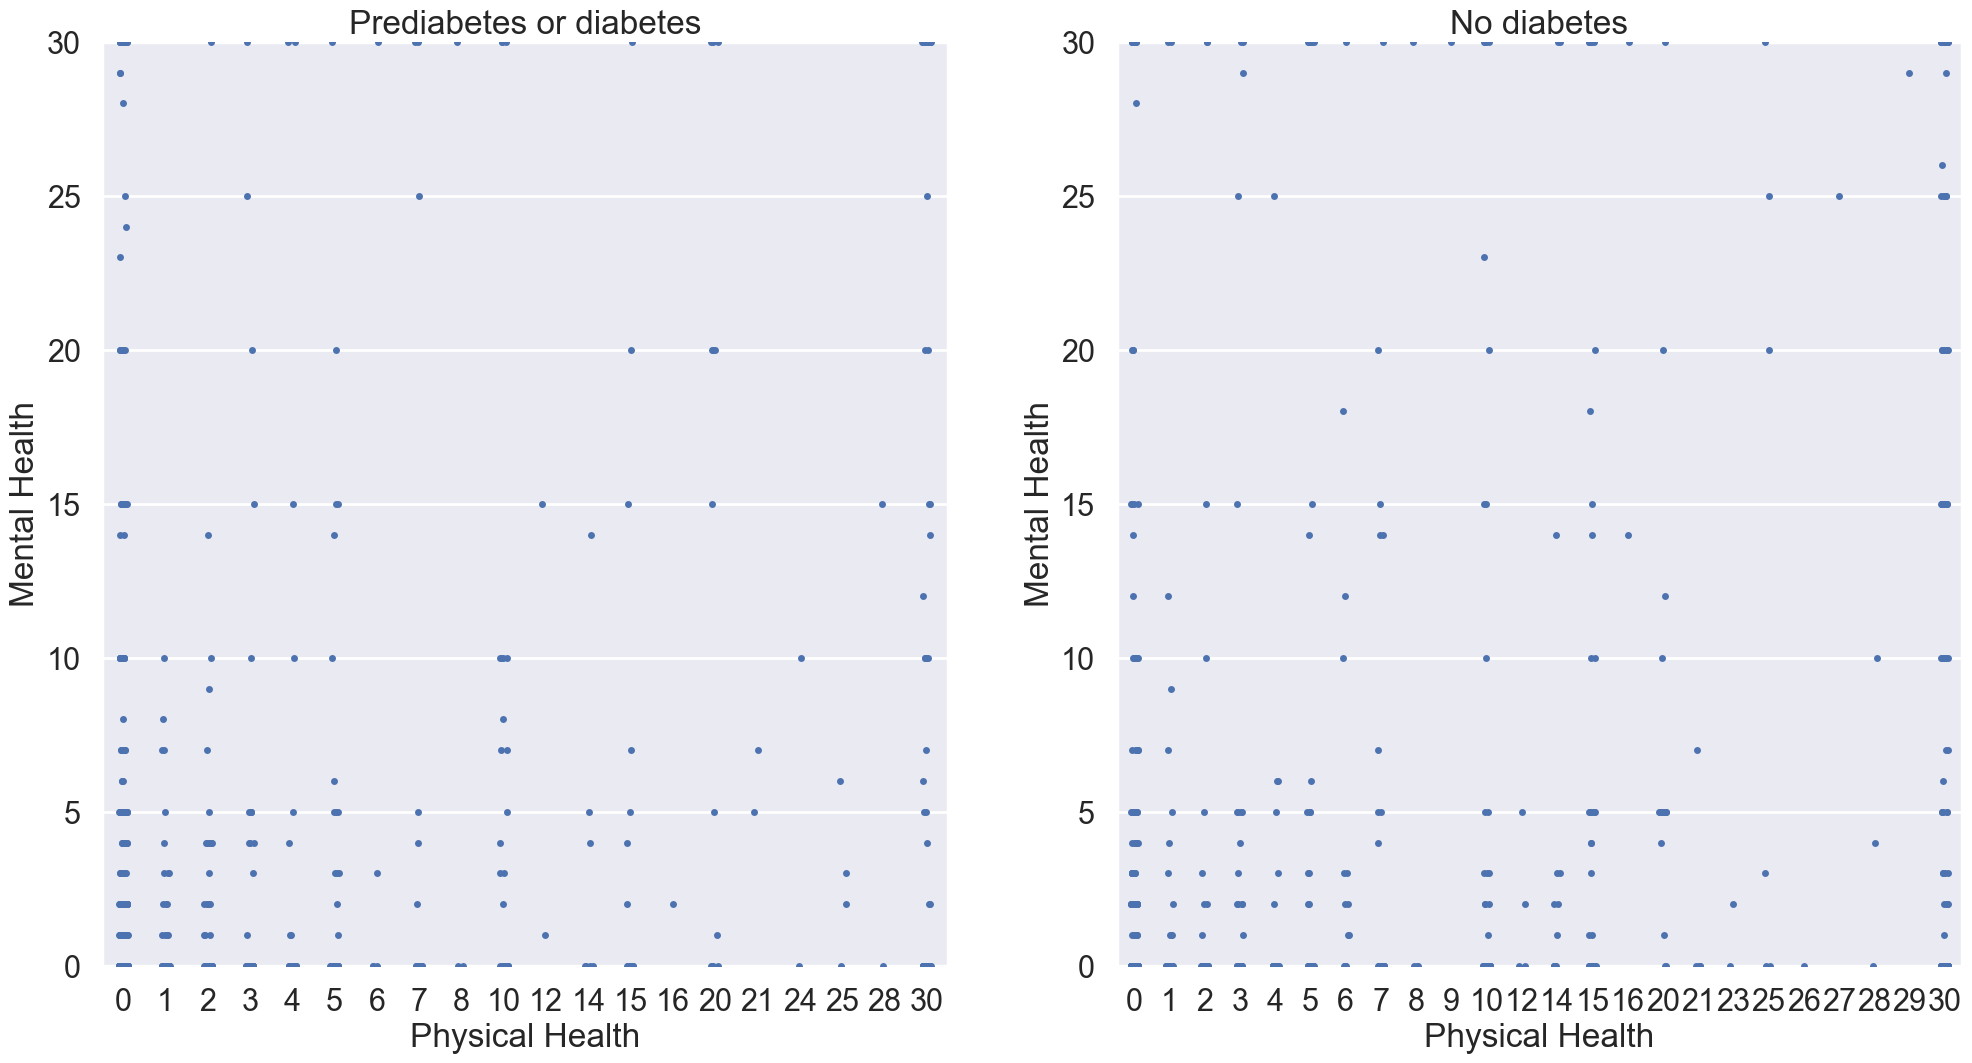

In [17]:
# plotted samples
sns.set(context="poster")

plt.figure(figsize=(24, 12))
combined_diabetes_sample = combined_diabetes[combined_diabetes['Diabetes_binary'] == 0].sample(1000)
combined_diabetes_sample2 = combined_diabetes[combined_diabetes['Diabetes_binary'] == 1].sample(1000)

# Strip plot for 'Diabetes_binary' = 1
plt.subplot(1, 2, 1)
sns.stripplot(x='PhysHlth', y='MentHlth', data=combined_diabetes_sample, alpha=1)
plt.title('Prediabetes or diabetes')
plt.xlabel('Physical Health')
plt.ylabel('Mental Health')
plt.ylim(0, 30)

# Strip plot for 'Diabetes_binary' = 0
plt.subplot(1, 2, 2)
sns.stripplot(x='PhysHlth', y='MentHlth', data=combined_diabetes_sample2, alpha=1)
plt.title('No diabetes')
plt.xlabel('Physical Health')
plt.ylabel('Mental Health')
plt.ylim(0, 30)

In [18]:
X_sample = X.sample(10)
X_sample.head()
# plt.figure(figsize=(30, 18))
# sns.stripplot(x = X['Income'], y = X['PhysHlth'], data=X_sample, alpha=.2)
# plt.show()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
29079,1,0,1,26,1,0,0,1,1,1,...,1,0,3,0,0,0,1,8,6,8
45642,1,0,1,37,1,0,0,1,0,0,...,0,1,3,3,7,0,1,2,3,2
31547,0,1,1,25,0,0,0,1,1,1,...,1,0,2,0,0,0,0,7,6,8
5652,1,0,1,27,0,0,0,1,0,1,...,1,0,1,0,0,0,1,11,6,6
244935,0,1,1,26,0,0,0,1,0,1,...,1,0,1,10,0,0,1,7,4,8


In [19]:
# sns.set_context('paper')
# plt.figure(figsize=(12, 6))
# phys_counts = X['PhysHlth'].value_counts().sort_index()
# ax = phys_counts.plot(kind='bar')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

In [20]:
count1 = ((X['AnyHealthcare'] == 0) & (X['NoDocbcCost'] == 0)).sum()
count2 = ((X['AnyHealthcare'] == 1) & (X['NoDocbcCost'] == 0)).sum()
count3 = ((X['AnyHealthcare'] == 0) & (X['NoDocbcCost'] == 1)).sum()
count4 = ((X['AnyHealthcare'] == 1) & (X['NoDocbcCost'] == 1)).sum()

# nodocbccost 0 = no
# nodocbccost 1 = yes
# 0 = no
# 1 = yes

print('no healthcare, no cost concern:', count1)
print('yes healthcare, no cost concern:', count2)
print('no healthcare, yes cost concern:', count3)
print('yes healthcare, yes cost concern:', count4)

no healthcare, no cost concern: 7838
yes healthcare, no cost concern: 224488
no healthcare, yes cost concern: 4579
yes healthcare, yes cost concern: 16775


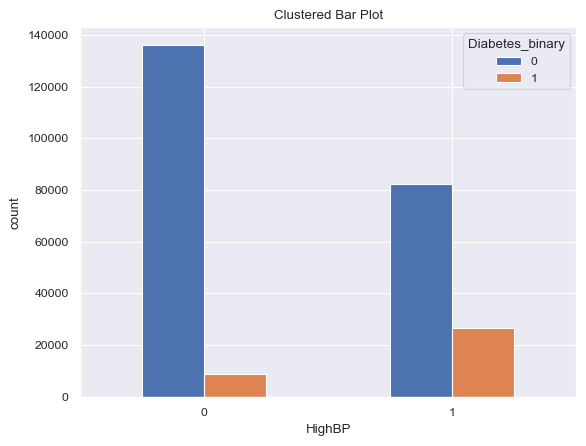

In [21]:
# High BP

column = 'Diabetes_binary'
column2 = 'HighBP'

pd.set_option('display.max_colwidth', None)
sns.set_context('paper') # context
# plt.figure(figsize=(100, 100)) # figsize

cross_table = pd.crosstab(index=combined_diabetes[column2], columns=combined_diabetes['Diabetes_binary'])
# cross_table

cross_table.plot(kind='bar')
plt.title('Clustered Bar Plot')
plt.xlabel(f'{column2}')
plt.ylabel('count')
plt.xticks(rotation=None)
plt.show()

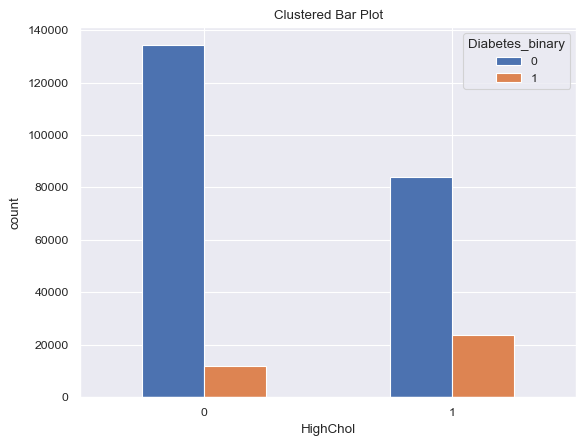

In [22]:
# HighChol

column = 'Diabetes_binary'
column2 = 'HighChol'

pd.set_option('display.max_colwidth', None)
sns.set_context('paper') # context
# plt.figure(figsize=(100, 100)) # figsize

cross_table = pd.crosstab(index=combined_diabetes[column2], columns=combined_diabetes['Diabetes_binary'])
# cross_table

cross_table.plot(kind='bar')
plt.title('Clustered Bar Plot')
plt.xlabel(f'{column2}')
plt.ylabel('count')
plt.xticks(rotation=None)
plt.show()

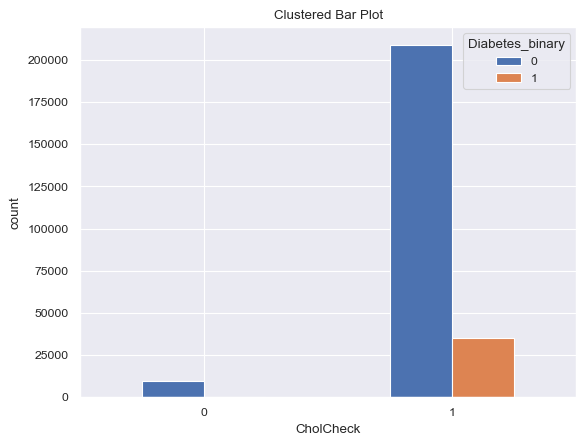

Diabetes_binary,0,1
CholCheck,,
0,9229,241
1,209105,35105


In [23]:
# CholCheck

column = 'Diabetes_binary'
column2 = 'CholCheck'

pd.set_option('display.max_colwidth', None)
sns.set_context('paper') # context
# plt.figure(figsize=(100, 100)) # figsize

cross_table = pd.crosstab(index=combined_diabetes[column2], columns=combined_diabetes['Diabetes_binary'])

cross_table.plot(kind='bar')
plt.title('Clustered Bar Plot')
plt.xlabel(f'{column2}')
plt.ylabel('count')
plt.xticks(rotation=None)
plt.show()

cross_table

In [24]:
# scrap work for two variable comparison

# Diabetes_binary
# HighBP
# HighChol
# CholCheck
# BMI
# Smoker
# Stroke
# HeartDiseaseorAttack
# PhysActivity
# Fruits
# Veggies
# HvyAlcoholConsump
# AnyHealthcare
# NoDocbcCost
# GenHlth
# MentHlth
# PhysHlth
# DiffWalk
# Sex
# Age
# Education
# Income

# ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
#        'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
#        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
#        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
#        'Income']

# column = 'BMI'
# column2 = 'BMI'

# pd.set_option('display.max_colwidth', None)
# sns.set_context('paper') # context
# plt.figure(figsize=(100, 100)) # figsize

# sns.boxplot(x='Diabetes_binary', y=column, data=combined_diabetes)
# sns.violinplot(x=column, y=column2, data=combined_diabetes)

# cross_table = pd.crosstab(index=combined_diabetes[column], columns=combined_diabetes['Diabetes_binary'])
# cross_table

# plt.figure(figsize=(10, 6))
# sns.heatmap(data=cross_table, cmap='viridis', annot=True, fmt='d')
# plt.title('Heatmap')
# plt.xlabel('Diabetes_binary')
# plt.ylabel(F"{column}")
# plt.show()

# cross_table.plot(kind='bar')
# plt.title('Clustered Bar Plot')
# plt.xlabel(f'{column}')
# plt.ylabel('count')
# plt.xticks(rotation=45)
# plt.show()

# plt.hist(data = combined_diabetes, x = 'BMI')

# two plots, one with diabetes and one without
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# yes diabetes or prediabetes
# sns.histplot(x=column, data=combined_diabetes[combined_diabetes['Diabetes_binary'] == 1], ax=axes[0])
# axes[0].set_title('Prediabetes or diabetes')
# axes[0].set_xlabel(f'{column}')

# no diabetes
# sns.histplot(x=column, data=combined_diabetes[combined_diabetes['Diabetes_binary'] == 0], ax=axes[1])
# axes[1].set_title('No diabetes')
# axes[1].set_xlabel(f'{column}')

Text(0.5, 0, 'BMI')

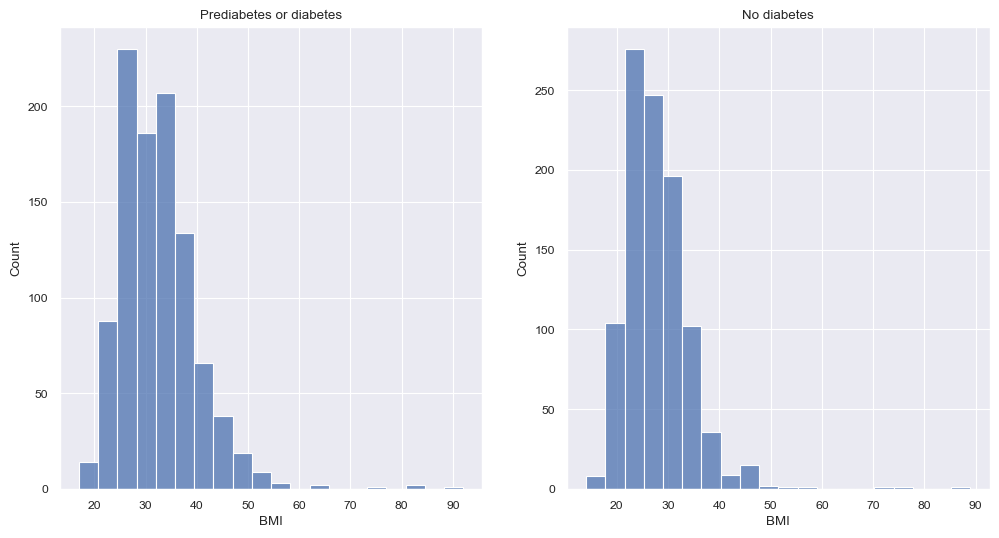

In [25]:
# two plots, one with diabetes and one without
column='BMI'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

combined_diabetes_sample = combined_diabetes[combined_diabetes['Diabetes_binary'] == 1].sample(1000)
combined_diabetes_sample2 = combined_diabetes[combined_diabetes['Diabetes_binary'] == 0].sample(1000)

# yes diabetes or prediabetes
sns.histplot(x=column, data=combined_diabetes_sample, ax=axes[0], bins=20)
axes[0].set_title('Prediabetes or diabetes')
axes[0].set_xlabel(f'{column}')

# no diabetes
sns.histplot(x=column, data=combined_diabetes_sample2, ax=axes[1], bins=20)
axes[1].set_title('No diabetes')
axes[1].set_xlabel(f'{column}')

Diabetes_binary,0,1
BMI,,
12,6,0
13,19,2
14,37,4
15,120,12
16,328,20
...,...,...
91,1,0
92,27,5
95,11,1


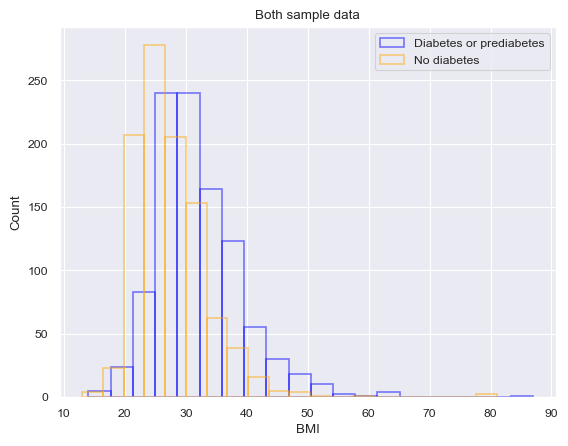

In [26]:
# BMI
# more helpful because there are way more no diabetes entries than those with diabetes
# which means it's harder to decipher the histogram

combined_diabetes_sample = combined_diabetes[combined_diabetes['Diabetes_binary'] == 1].sample(1000)
combined_diabetes_sample2 = combined_diabetes[combined_diabetes['Diabetes_binary'] == 0].sample(1000)

sns.histplot(x=column, data=combined_diabetes_sample, bins=20, color='blue', fill=False, label='Diabetes or prediabetes', alpha=.5)
sns.histplot(x=column, data=combined_diabetes_sample2, bins=20, color='orange', fill=False, label='No diabetes', alpha=.5)
plt.xlabel(f'{column}')
plt.title('Both sample data')

# Add legend
plt.legend()

cross_table = pd.crosstab(index=combined_diabetes[column], columns=combined_diabetes['Diabetes_binary'])
cross_table

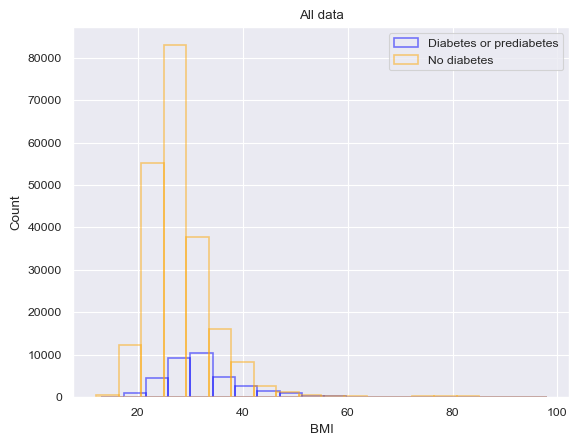

In [27]:
# BMI continued
sns.histplot(x=column, data=combined_diabetes[combined_diabetes['Diabetes_binary'] == 1], bins=20,
             color='blue', fill=False, label='Diabetes or prediabetes', alpha=.5)

sns.histplot(x=column, data=combined_diabetes[combined_diabetes['Diabetes_binary'] == 0], bins=20, 
             color='orange', fill=False, label='No diabetes', alpha=.5)

plt.xlabel(f'{column}')
plt.title('All data')

cross_table = pd.crosstab(index=combined_diabetes[column], columns=combined_diabetes['Diabetes_binary'])
cross_table

# Add legend
plt.legend()

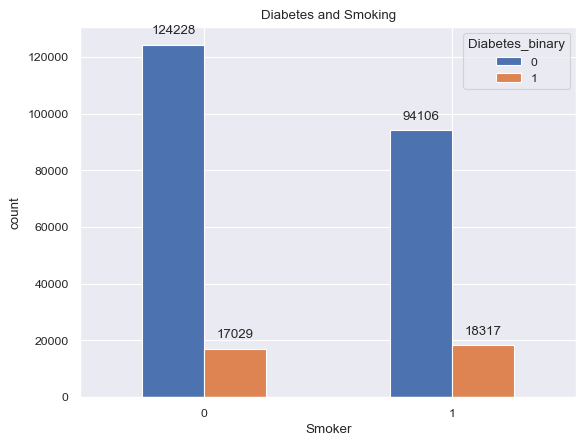

Diabetes_binary,0,1
Smoker,,
0,124228,17029
1,94106,18317


In [28]:
# Smoker

column = 'Diabetes_binary'
column2 = 'Smoker'

pd.set_option('display.max_colwidth', None)
sns.set_context('paper') # context
# plt.figure(figsize=(100, 100)) # figsize

cross_table = pd.crosstab(index=combined_diabetes[column2], columns=combined_diabetes['Diabetes_binary'])

ax = cross_table.plot(kind='bar')

# Add count value labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title(f'Diabetes and Smoking')
plt.xlabel(f'{column2}')
plt.ylabel('count')
plt.xticks(rotation=None)
plt.show()

cross_table

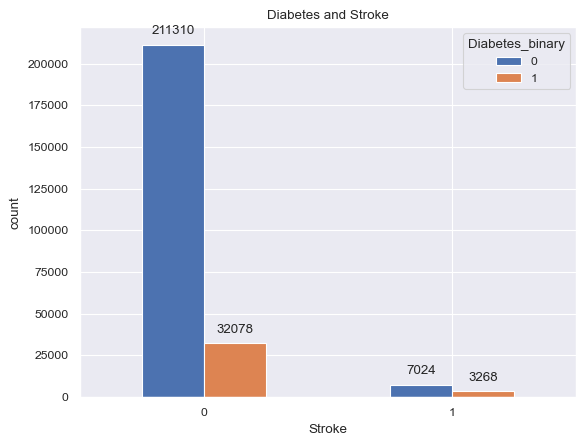

Diabetes_binary,0,1
Stroke,,
0,211310,32078
1,7024,3268


In [29]:
# Smoker

column = 'Diabetes_binary'
column2 = 'Stroke'

pd.set_option('display.max_colwidth', None)
sns.set_context('paper') # context
# plt.figure(figsize=(100, 100)) # figsize

cross_table = pd.crosstab(index=combined_diabetes[column2], columns=combined_diabetes['Diabetes_binary'])

ax = cross_table.plot(kind='bar')

# Add count value labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title(f'Diabetes and {column2}')
plt.xlabel(f'{column2}')
plt.ylabel('count')
plt.xticks(rotation=None)
plt.show()

cross_table

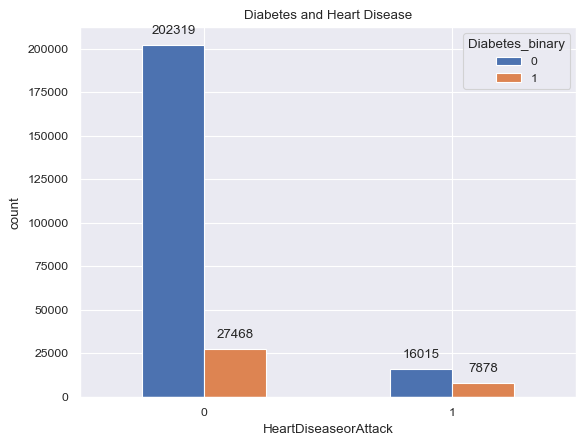

Diabetes_binary,0,1
HeartDiseaseorAttack,,
0,202319,27468
1,16015,7878


In [30]:
# HeartDiseaseorAttack

column = 'Diabetes_binary'
column2 = 'HeartDiseaseorAttack'

pd.set_option('display.max_colwidth', None)
sns.set_context('paper') # context
# plt.figure(figsize=(100, 100)) # figsize

cross_table = pd.crosstab(index=combined_diabetes[column2], columns=combined_diabetes['Diabetes_binary'])

ax = cross_table.plot(kind='bar')

# Add count value labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title(f'Diabetes and Heart Disease')
plt.xlabel(f'{column2}')
plt.ylabel('count')
plt.xticks(rotation=None)
plt.show()

cross_table

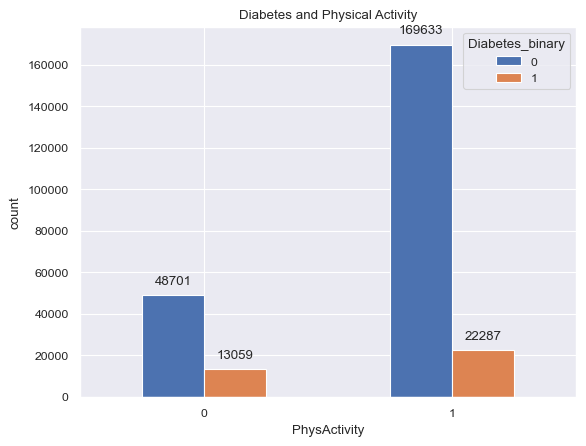

Diabetes_binary,0,1
PhysActivity,,
0,48701,13059
1,169633,22287


In [31]:
# PhysActivity

column = 'Diabetes_binary'
column2 = 'PhysActivity'

pd.set_option('display.max_colwidth', None)
sns.set_context('paper') # context
# plt.figure(figsize=(100, 100)) # figsize

cross_table = pd.crosstab(index=combined_diabetes[column2], columns=combined_diabetes['Diabetes_binary'])

ax = cross_table.plot(kind='bar')

# Add count value labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title(f'Diabetes and Physical Activity')
plt.xlabel(f'{column2}')
plt.ylabel('count')
plt.xticks(rotation=None)
plt.show()

cross_table

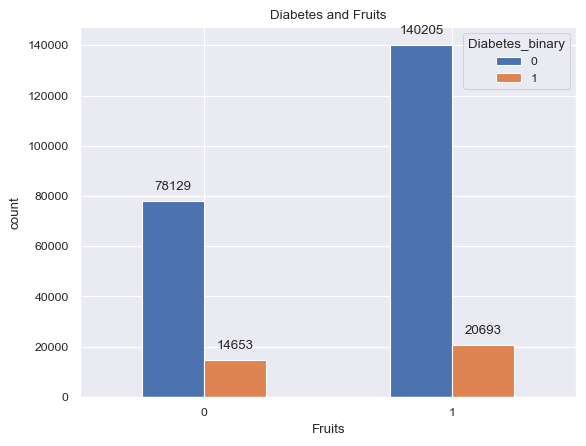

Diabetes_binary,0,1
Fruits,,
0,78129,14653
1,140205,20693


In [32]:
# Fruits

column = 'Diabetes_binary'
column2 = 'Fruits'

pd.set_option('display.max_colwidth', None)
sns.set_context('paper') # context
# plt.figure(figsize=(100, 100)) # figsize

cross_table = pd.crosstab(index=combined_diabetes[column2], columns=combined_diabetes['Diabetes_binary'])

ax = cross_table.plot(kind='bar')

# Add count value labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title(f'Diabetes and {column2}')
plt.xlabel(f'{column2}')
plt.ylabel('count')
plt.xticks(rotation=None)
plt.show()

cross_table

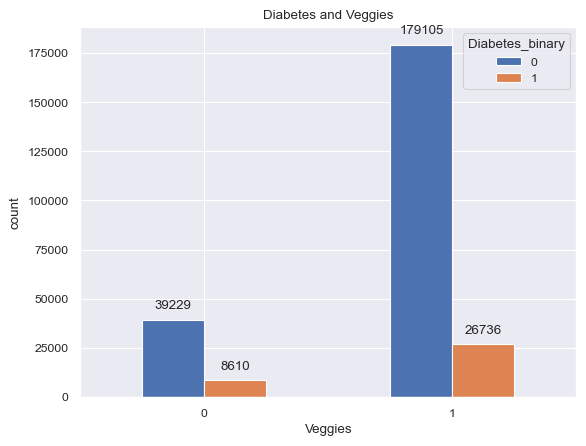

Diabetes_binary,0,1
Veggies,,
0,39229,8610
1,179105,26736


In [33]:
# Veggies

column = 'Diabetes_binary'
column2 = 'Veggies'

pd.set_option('display.max_colwidth', None)
sns.set_context('paper') # context
# plt.figure(figsize=(100, 100)) # figsize

cross_table = pd.crosstab(index=combined_diabetes[column2], columns=combined_diabetes['Diabetes_binary'])

ax = cross_table.plot(kind='bar')

# Add count value labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title(f'Diabetes and {column2}')
plt.xlabel(f'{column2}')
plt.ylabel('count')
plt.xticks(rotation=None)
plt.show()

cross_table

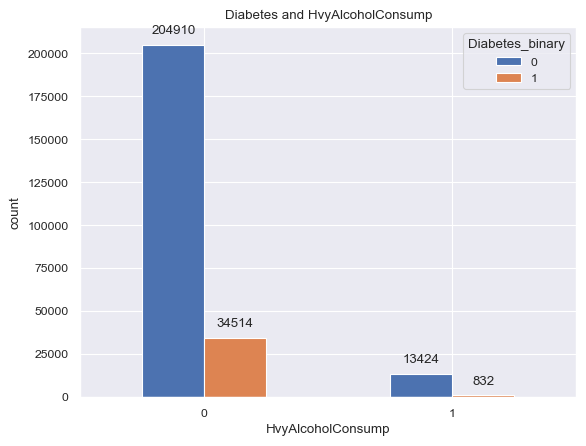

Diabetes_binary,0,1
HvyAlcoholConsump,,
0,204910,34514
1,13424,832


In [34]:
# HvyAlcoholConsump

column = 'Diabetes_binary'
column2 = 'HvyAlcoholConsump'

pd.set_option('display.max_colwidth', None)
sns.set_context('paper') # context
# plt.figure(figsize=(100, 100)) # figsize

cross_table = pd.crosstab(index=combined_diabetes[column2], columns=combined_diabetes['Diabetes_binary'])

ax = cross_table.plot(kind='bar')

# Add count value labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title(f'Diabetes and {column2}')
plt.xlabel(f'{column2}')
plt.ylabel('count')
plt.xticks(rotation=None)
plt.show()

cross_table

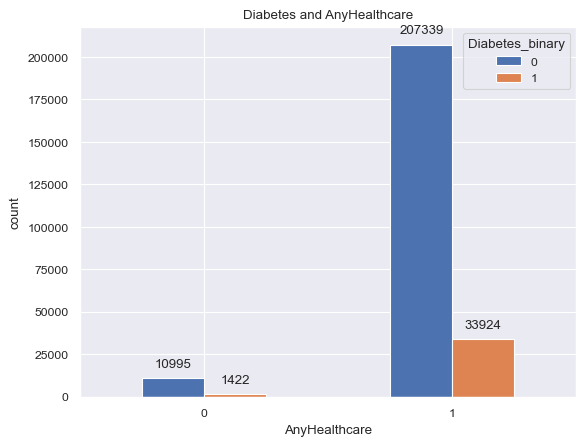

Diabetes_binary,0,1
AnyHealthcare,,
0,10995,1422
1,207339,33924


In [35]:
# AnyHealthcare

column = 'Diabetes_binary'
column2 = 'AnyHealthcare'

pd.set_option('display.max_colwidth', None)
sns.set_context('paper') # context
# plt.figure(figsize=(100, 100)) # figsize

cross_table = pd.crosstab(index=combined_diabetes[column2], columns=combined_diabetes['Diabetes_binary'])

ax = cross_table.plot(kind='bar')

# Add count value labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title(f'Diabetes and {column2}')
plt.xlabel(f'{column2}')
plt.ylabel('count')
plt.xticks(rotation=None)
plt.show()

cross_table

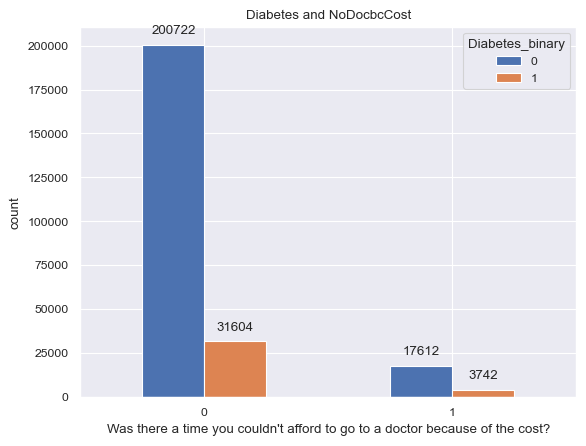

Diabetes_binary,0,1
NoDocbcCost,,
0,200722,31604
1,17612,3742


In [36]:
# NoDocbcCost

column = 'Diabetes_binary'
column2 = 'NoDocbcCost'

pd.set_option('display.max_colwidth', None)
sns.set_context('paper') # context
# plt.figure(figsize=(100, 100)) # figsize

cross_table = pd.crosstab(index=combined_diabetes[column2], columns=combined_diabetes['Diabetes_binary'])

ax = cross_table.plot(kind='bar')

# Add count value labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title(f'Diabetes and {column2}')
plt.xlabel('Was there a time you couldn\'t afford to go to a doctor because of the cost?')
plt.ylabel('count')
plt.xticks(rotation=None)
plt.show()

cross_table

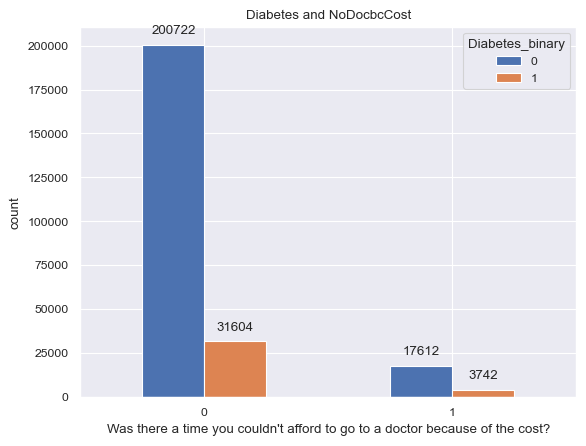

Diabetes_binary,0,1
NoDocbcCost,,
0,200722,31604
1,17612,3742


In [37]:
# NoDocbcCost

column = 'Diabetes_binary'
column2 = 'NoDocbcCost'

pd.set_option('display.max_colwidth', None)
sns.set_context('paper') # context
# plt.figure(figsize=(100, 100)) # figsize

cross_table = pd.crosstab(index=combined_diabetes[column2], columns=combined_diabetes['Diabetes_binary'])

ax = cross_table.plot(kind='bar')

# Add count value labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title(f'Diabetes and {column2}')
plt.xlabel('Was there a time you couldn\'t afford to go to a doctor because of the cost?')
plt.ylabel('count')
plt.xticks(rotation=None)
plt.show()

cross_table

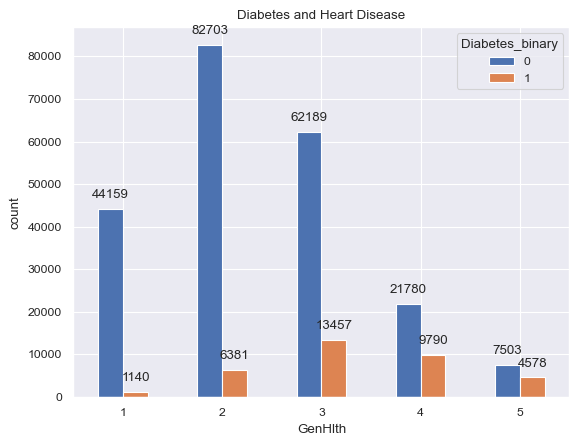

Diabetes_binary,0,1
GenHlth,,
1,44159,1140
2,82703,6381
3,62189,13457
4,21780,9790
5,7503,4578


In [38]:
# GenHlth

column = 'Diabetes_binary'
column2 = 'GenHlth'

pd.set_option('display.max_colwidth', None)
sns.set_context('paper') # context
# plt.figure(figsize=(100, 100)) # figsize

cross_table = pd.crosstab(index=combined_diabetes[column2], columns=combined_diabetes['Diabetes_binary'])

ax = cross_table.plot(kind='bar')

# Add count value labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title(f'Diabetes and Heart Disease')
plt.xlabel(f'{column2}')
plt.ylabel('count')
plt.xticks(rotation=None)
plt.show()

cross_table

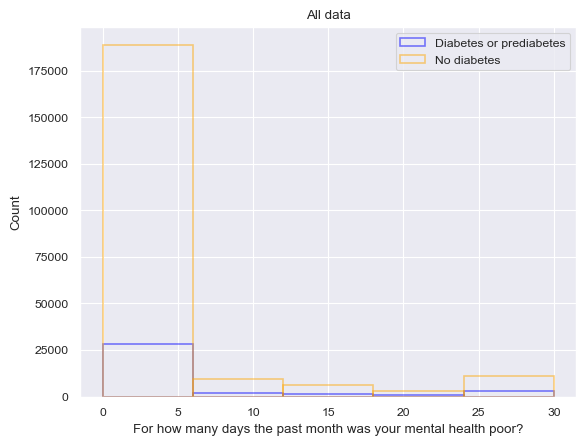

In [39]:
# MentHlth

column = 'MentHlth'

sns.histplot(x=column, data=combined_diabetes[combined_diabetes['Diabetes_binary'] == 1], bins=5,
             color='blue', fill=False, label='Diabetes or prediabetes', alpha=.5)

sns.histplot(x=column, data=combined_diabetes[combined_diabetes['Diabetes_binary'] == 0], bins=5, 
             color='orange', fill=False, label='No diabetes', alpha=.5)

plt.xlabel('For how many days the past month was your mental health poor?')
plt.title('All data')

cross_table = pd.crosstab(index=combined_diabetes[column], columns=combined_diabetes['Diabetes_binary'])
cross_table

# Add legend
plt.legend()

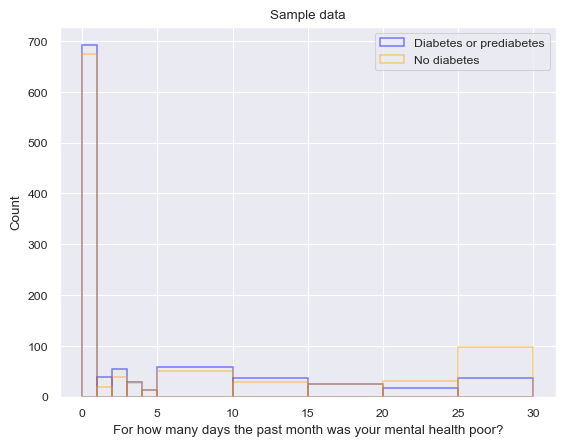

In [40]:
# MentHlth continued

column = 'MentHlth'

c1 = combined_diabetes[combined_diabetes['Diabetes_binary'] == 0].sample(1000)
c2 = combined_diabetes[combined_diabetes['Diabetes_binary'] == 1].sample(1000)

bin_count = [0,1,2,3,4,5,10,15,20,25,30]

sns.histplot(x=column, data=c1, bins=bin_count,
             color='blue', fill=False, label='Diabetes or prediabetes', alpha=.5)

sns.histplot(x=column, data=c2, bins=bin_count, 
             color='orange', fill=False, label='No diabetes', alpha=.5)

plt.xlabel('For how many days the past month was your mental health poor?')
plt.title('Sample data')

cross_table = pd.crosstab(index=combined_diabetes[column], columns=combined_diabetes['Diabetes_binary'])
cross_table

# Add legend
plt.legend()

<Figure size 10000x10000 with 0 Axes>

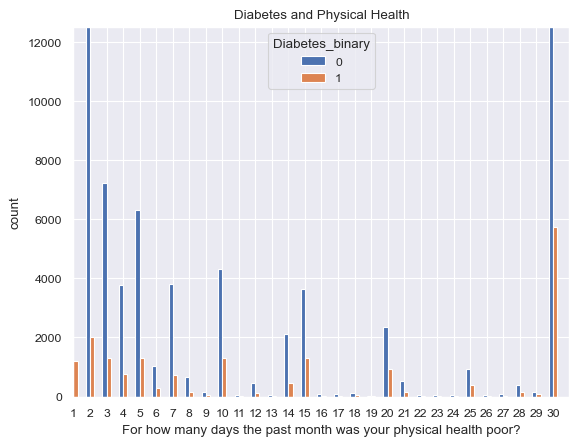

Diabetes_binary,0,1
PhysHlth,,
0,143312,16740
1,10200,1188
2,12736,2028
3,7206,1289
4,3779,763
5,6308,1314
6,1048,282
7,3795,743
8,650,159


In [41]:
# PhysHlth

column = 'PhysHlth'

pd.set_option('display.max_colwidth', None)
sns.set_context('paper') # context
plt.figure(figsize=(100, 100)) # figsize 

cross_table = pd.crosstab(index=combined_diabetes[column], columns=combined_diabetes['Diabetes_binary'])

ax = cross_table.plot(kind='bar')

plt.title(f'Diabetes and Physical Health')
plt.xlabel('For how many days the past month was your physical health poor?')
plt.ylabel('count')
plt.xticks(rotation=None)
plt.xlim(1,31)
plt.ylim(0,12500)
plt.show()

cross_table

<Figure size 10000x10000 with 0 Axes>

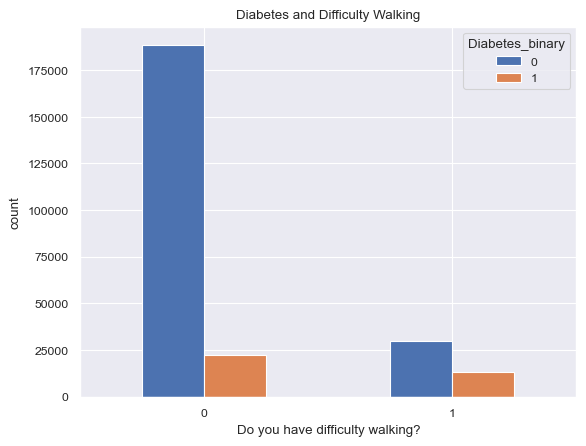

Diabetes_binary,0,1
DiffWalk,,
0,188780,22225
1,29554,13121


In [42]:
# DiffWalk

column = 'DiffWalk'

pd.set_option('display.max_colwidth', None)
sns.set_context('paper') # context
plt.figure(figsize=(100, 100)) # figsize 

cross_table = pd.crosstab(index=combined_diabetes[column], columns=combined_diabetes['Diabetes_binary'])

ax = cross_table.plot(kind='bar')

plt.title(f'Diabetes and Difficulty Walking')
plt.xlabel('Do you have difficulty walking?')
plt.ylabel('count')
plt.xticks(rotation=None)
plt.show()

cross_table

<Figure size 10000x10000 with 0 Axes>

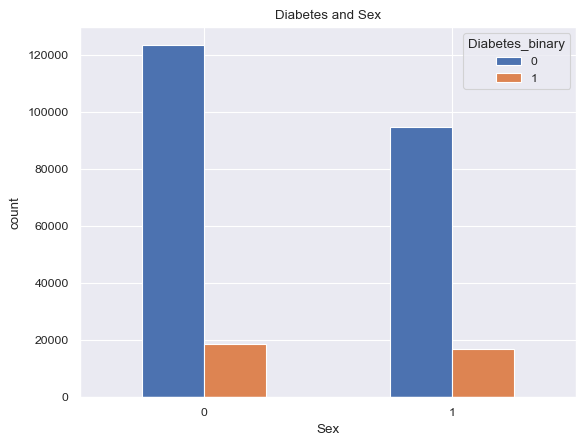

Diabetes_binary,0,1
Sex,,
0,123563,18411
1,94771,16935


In [43]:
# Sex

column = 'Sex'

pd.set_option('display.max_colwidth', None)
sns.set_context('paper') # context
plt.figure(figsize=(100, 100)) # figsize 

cross_table = pd.crosstab(index=combined_diabetes[column], columns=combined_diabetes['Diabetes_binary'])

ax = cross_table.plot(kind='bar')

plt.title(f'Diabetes and {column}')
plt.xlabel('Sex')
plt.ylabel('count')
plt.xticks(rotation=None)
plt.show()

cross_table

<Figure size 10000x10000 with 0 Axes>

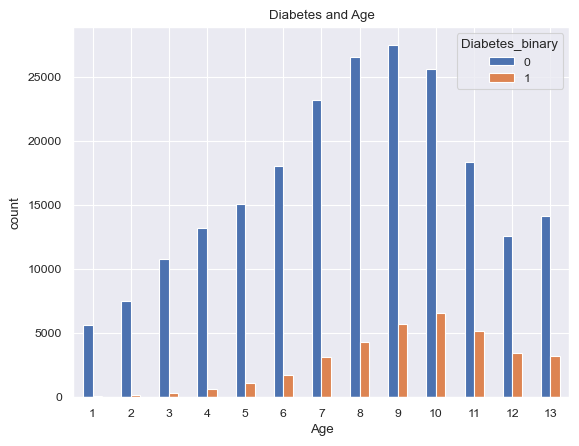

Diabetes_binary,0,1
Age,,
1,5622,78
2,7458,140
3,10809,314
4,13197,626
5,15106,1051
6,18077,1742
7,23226,3088
8,26569,4263
9,27511,5733


In [44]:
# Age

column = 'Age'

pd.set_option('display.max_colwidth', None)
sns.set_context('paper') # context
plt.figure(figsize=(100, 100)) # figsize 

cross_table = pd.crosstab(index=combined_diabetes[column], columns=combined_diabetes['Diabetes_binary'])

ax = cross_table.plot(kind='bar')

plt.title(f'Diabetes and {column}')
plt.xlabel(f'{column}')
plt.ylabel('count')
plt.xticks(rotation=None)
plt.show()

cross_table

# Education
# Income

<Figure size 10000x10000 with 0 Axes>

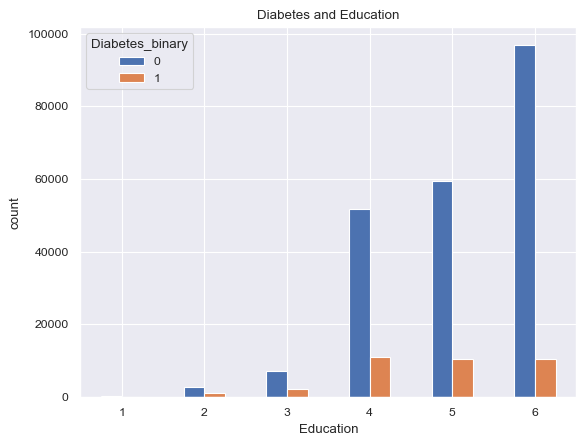

Diabetes_binary,0,1
Education,,
1,127,47
2,2860,1183
3,7182,2296
4,51684,11066
5,59556,10354
6,96925,10400


In [45]:
# Education

column = 'Education'

pd.set_option('display.max_colwidth', None)
sns.set_context('paper') # context
plt.figure(figsize=(100, 100)) # figsize 

cross_table = pd.crosstab(index=combined_diabetes[column], columns=combined_diabetes['Diabetes_binary'])

ax = cross_table.plot(kind='bar')

plt.title(f'Diabetes and {column}')
plt.xlabel(f'{column}')
plt.ylabel('count')
plt.xticks(rotation=None)
plt.show()

cross_table

# Income

<Figure size 10000x10000 with 0 Axes>

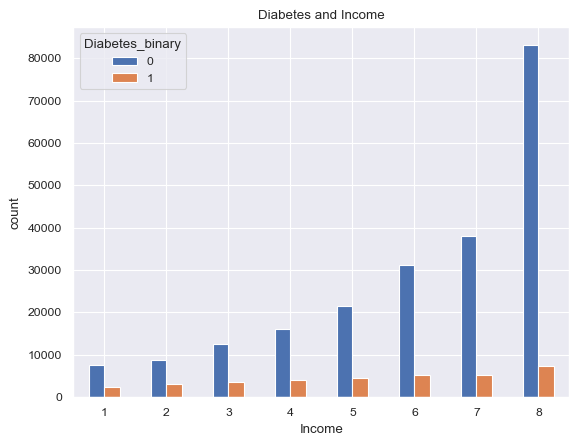

Diabetes_binary,0,1
Income,,
1,7428,2383
2,8697,3086
3,12426,3568
4,16081,4054
5,21379,4504
6,31179,5291
7,37954,5265
8,83190,7195


In [46]:
# Income

column = 'Income'

pd.set_option('display.max_colwidth', None)
sns.set_context('paper') # context
plt.figure(figsize=(100, 100)) # figsize 

cross_table = pd.crosstab(index=combined_diabetes[column], columns=combined_diabetes['Diabetes_binary'])

ax = cross_table.plot(kind='bar')

plt.title(f'Diabetes and {column}')
plt.xlabel(f'{column}')
plt.ylabel('count')
plt.xticks(rotation=None)
plt.show()

cross_table

# Income

In [47]:
# PEARSON R


# def pearson_r(x, y):
#     """Compute Pearson correlation coefficient between two arrays."""
#     # Compute correlation matrix: corr_mat
#     corr_mat = np.corrcoef(x, y)

#     # Return entry [0,1]
#     return corr_mat[0,1]

# Compute Pearson correlation coefficient for 
# r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
# print(r)

correlation_results = []

for column in combined_diabetes.columns:
    if column != 'Diabetes_binary':  # Exclude 'Diabetes_binary' column itself
        corr_coeff, p_value = pearsonr(combined_diabetes['Diabetes_binary'], combined_diabetes[column])
        correlation_results.append((column, corr_coeff, p_value))

correlation_results.sort(key=lambda x: abs(x[1]), reverse=True)

for result in correlation_results:
    column, corr_coeff, p_value = result
    print(f"Diabetes and {column}: {corr_coeff:.2f} (p-value: {p_value:.4f})")

Diabetes and GenHlth: 0.29 (p-value: 0.0000)
Diabetes and HighBP: 0.26 (p-value: 0.0000)
Diabetes and DiffWalk: 0.22 (p-value: 0.0000)
Diabetes and BMI: 0.22 (p-value: 0.0000)
Diabetes and HighChol: 0.20 (p-value: 0.0000)
Diabetes and Age: 0.18 (p-value: 0.0000)
Diabetes and HeartDiseaseorAttack: 0.18 (p-value: 0.0000)
Diabetes and PhysHlth: 0.17 (p-value: 0.0000)
Diabetes and Income: -0.16 (p-value: 0.0000)
Diabetes and Education: -0.12 (p-value: 0.0000)
Diabetes and PhysActivity: -0.12 (p-value: 0.0000)
Diabetes and Stroke: 0.11 (p-value: 0.0000)
Diabetes and MentHlth: 0.07 (p-value: 0.0000)
Diabetes and CholCheck: 0.06 (p-value: 0.0000)
Diabetes and Smoker: 0.06 (p-value: 0.0000)
Diabetes and HvyAlcoholConsump: -0.06 (p-value: 0.0000)
Diabetes and Veggies: -0.06 (p-value: 0.0000)
Diabetes and Fruits: -0.04 (p-value: 0.0000)
Diabetes and NoDocbcCost: 0.03 (p-value: 0.0000)
Diabetes and Sex: 0.03 (p-value: 0.0000)
Diabetes and AnyHealthcare: 0.02 (p-value: 0.0000)


# pre processing and training data development

In [5]:
# Choose variables / columns
dropped_columns = []

# Add columns to be dropped to the list
dropped_columns.append("Diabetes_binary")
dropped_columns.append("AnyHealthcare")
dropped_columns.append("Sex")
dropped_columns.append("NoDocbcCost")
dropped_columns.append("Veggies")
dropped_columns.append("Fruits")
dropped_columns.append("HvyAlcoholConsump")
dropped_columns.append("Smoker")
dropped_columns.append("MentHlth")
dropped_columns.append("CholCheck")
dropped_columns.append("Stroke")

# Create a copy of dataframe to dynamically update without permanent column removal
X = combined_diabetes.copy()

# Drop columns from DataFrame X
X = X.drop(dropped_columns, axis=1)

# checking columns
# print(X.columns)
# print('=')
# print('# of columns: ' + str(X.shape[1]))

# constant
X = sm.add_constant(X)

y = combined_diabetes[["Diabetes_binary"]].values.ravel()

In [6]:
random_state = None

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and fit the model
# model = LogisticRegression()
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

In [50]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
# confusion_matrix

# Calculate accuracy and error rate from confusion matrix
def calculate_metrics(confusion_matrix):
    TP = confusion_matrix[1][1]  # True Positives
    TN = confusion_matrix[0][0]  # True Negatives
    FP = confusion_matrix[0][1]  # False Positives
    FN = confusion_matrix[1][0]  # False Negatives

    accuracy = (TP + TN) / (TP + TN + FP + FN) * 100
    error_rate = (FP + FN) / (TP + TN + FP + FN) * 100
    tp_rate = TP / (TP + FP) * 100
    tn_rate = TN / (TN + FN) * 100

    # print(TP, TN, FP, FN)
    
    return accuracy, error_rate, tp_rate, tn_rate

accuracy, error_rate, tp_rate, tn_rate = calculate_metrics(confusion_matrix)
print("Accuracy:", accuracy, '%')
print("Error Rate:", error_rate, '%')
print("True Positive Rate:", tp_rate, '%')
print("True Negative Rate:", tn_rate, '%')

Accuracy: 84.92194891201514 %
Error Rate: 15.078051087984862 %
True Positive Rate: 19.873089126045574 %
True Negative Rate: 95.21939637459477 %


In [51]:
# scrap:


# Calculate the mean squared error (MSE) on the testing set
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

# Print the coefficients and intercept of the linear regression model
# coefficients = model.coef_
# intercept = model.intercept_
# print("Coefficients:", coefficients)
# print("Intercept:", intercept)

In [52]:
# combined_diabetes['Diabetes_binary'].value_counts()

# modeling

In [53]:
# 
# Hyperparameter Tuning Logistic Regression 
# 

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sk

Best Parameters: {'C': 0.001, 'penalty': 'l2'}


In [54]:
# 
# Logistic Regression
# 

best_params = {'penalty': 'l2', 'C': 0.001}

best_logreg = LogisticRegression(max_iter=1000, **best_params)

best_logreg.fit(X_train, y_train)

y_pred_train = best_logreg.predict(X_train)
y_pred_test = best_logreg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print('')

print("Classification Report (Testing Data):")
print(classification_report(y_test, y_pred_test))

Training Accuracy: 0.8631477977504468
Testing Accuracy: 0.8658152002522863

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     21901
           1       0.53      0.14      0.22      3467

    accuracy                           0.87     25368
   macro avg       0.71      0.56      0.57     25368
weighted avg       0.83      0.87      0.83     25368



In [17]:
# 
# Hyperparameter Tuning Random Forest
# 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf_clf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_clf, param_grid, cv=5, verbose=1) #will try verbose 3 next time for more info
grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# TUNING RESULTS! TOOK A LONG TIME
# Fitting 5 folds for each of 81 candidates, totalling 405 fits
# Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


In [20]:
# 
# Random Forest
# 

best_params = {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}

# Initialize the Random Forest classifier
rf_clf_best = RandomForestClassifier(random_state=42, **best_params)

rf_clf_best.fit(X_train, y_train)

y_pred_train_rf = rf_clf_best.predict(X_train)
y_pred_test_rf = rf_clf_best.predict(X_test)

train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)

print("Training Accuracy (Random Forest):", train_accuracy_rf)
print("Testing Accuracy (Random Forest):", test_accuracy_rf)

print("Classification Report (Random Forest - Testing Data):")
print(classification_report(y_test, y_pred_test_rf))

# # Train the classifier
# rf_classifier.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = rf_classifier.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# # Get more detailed evaluation metrics
# print(classification_report(y_test, y_pred))

Training Accuracy (Random Forest): 0.8688023406566453
Testing Accuracy (Random Forest): 0.86419899085462
Classification Report (Random Forest - Testing Data):
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     21767
           1       0.63      0.11      0.18      3601

    accuracy                           0.86     25368
   macro avg       0.75      0.55      0.55     25368
weighted avg       0.84      0.86      0.82     25368



In [ ]:
# Decision Tree Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_dt_classifier = grid_search.best_estimator_
y_pred = best_dt_classifier.predict(X_test)

In [ ]:
# 
# Decision Tree
# 

from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get more detailed evaluation metrics
print(classification_report(y_test, y_pred))

In [ ]:
# Decision Tree pt 2

from sklearn import tree
import pydotplus
from IPython.display import Image 

# plt.figure(figsize=(12, 8))
# tree.plot_tree(dt_classifier, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
# plt.show()

# Set the figure size for a poster-size plot (e.g., A0 or 36" × 48")
plt.figure(figsize=(100, 128))  # Adjust figure size as needed for your poster size

# Plot the decision tree with the adjusted figure size
tree.plot_tree(dt_classifier, 
               feature_names=X.columns, 
               class_names=['No Diabetes', 'Diabetes'], 
               filled=True,
               fontsize=18)

# Save or display the plot
plt.savefig('decision_tree_poster.png')  # Save the plot as an image file
plt.show()  # Display the plot in the notebook or console